# Exploratory Data Analysis

In [30]:
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
import sys
sys.path.append("../")

from image_classification.datasets.fashion_mnist import FashionMNIST

## Config

In [32]:
data_dir = Path("../data/fashionmnist")

## Raw Data

In [37]:
trainset = FashionMNIST(is_train=True, data_dir=data_dir, transform=transforms.ToTensor())

In [38]:
dataloader = DataLoader(trainset, batch_size=16)

In [39]:
batch, labels = next(iter(dataloader))

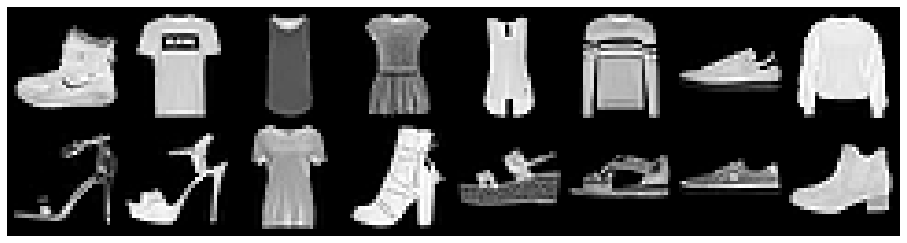

In [40]:
fig, ax = plt.subplots(figsize=(16, 32))
grid_img = T.ToPILImage()(torchvision.utils.make_grid(batch, nrow=8))
ax.imshow(np.asarray(grid_img))
ax.axis("off")
plt.show()

## Rotate and flip preprocessing

In [46]:
preprocessor = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.6),
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomAffine(degrees=30, translate=(0.1,0.1), scale=(0.8,0.8)),
    transforms.ToTensor(),
    transforms.Normalize((0.2861), (0.3528)) 
])

In [47]:
trainset = FashionMNIST(is_train=True, data_dir=data_dir, transform=preprocessor)

In [48]:
dataloader = DataLoader(trainset, batch_size=16)

In [49]:
batch, labels = next(iter(dataloader))

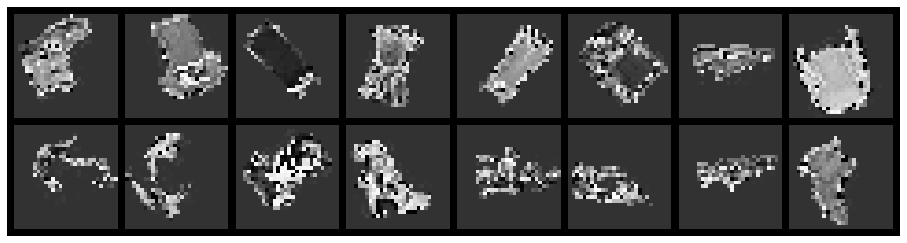

In [50]:
fig, ax = plt.subplots(figsize=(16, 32))
grid_img = T.ToPILImage()(torchvision.utils.make_grid(batch, nrow=8))
ax.imshow(np.asarray(grid_img))
ax.axis("off")
plt.show()

## Jitter, rotate and flip preprocessing

In [51]:
preprocessor = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1,0.1), scale=(0.8,0.8)),
    transforms.ToTensor(),
    transforms.Normalize((0.2861), (0.3528)) 
])

In [52]:
trainset = FashionMNIST(is_train=True, data_dir=data_dir, transform=preprocessor)

In [53]:
dataloader = DataLoader(trainset, batch_size=16)

In [54]:
batch, labels = next(iter(dataloader))

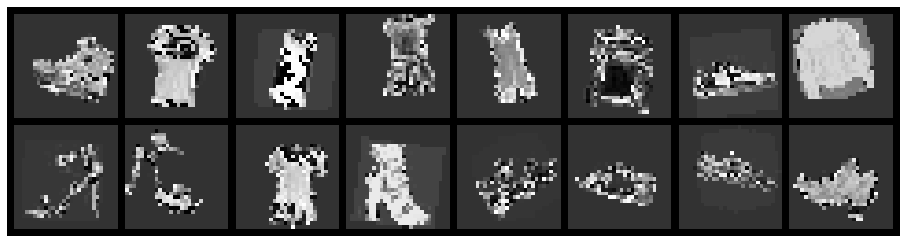

In [55]:
fig, ax = plt.subplots(figsize=(16, 32))
grid_img = T.ToPILImage()(torchvision.utils.make_grid(batch, nrow=8))
ax.imshow(np.asarray(grid_img))
ax.axis("off")
plt.show()